# **Very Simple Decision Tree application on iris Data**

In [1]:
import sys
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
import numpy as np
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from pathlib import Path

In [2]:
IMAGES_PATH = Path("content/images/decision_trees")
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

tree_classifier = DecisionTreeClassifier(max_depth=2, random_state=1618)
tree_classifier.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=1618)

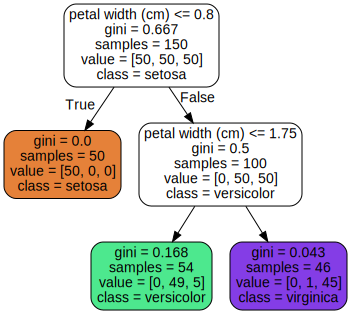

In [4]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_classifier,
        out_file=str(IMAGES_PATH / "iris_tree.dot"),
        feature_names=["petal length (cm)", "petal width (cm)"],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

from graphviz import Source
Source.from_file(IMAGES_PATH / "iris_tree.dot")

In [5]:
pca_pipeline = make_pipeline(StandardScaler(), PCA())
X_iris_rotated = pca_pipeline.fit_transform(X_iris)
tree_classifier_pca = DecisionTreeClassifier(max_depth=2, random_state=1618)
tree_classifier_pca.fit(X_iris_rotated, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=1618)

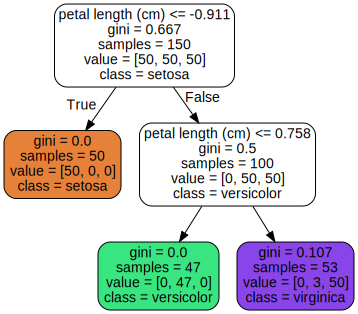

In [6]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_classifier_pca,
        out_file=str(IMAGES_PATH / "iris_tree_pca.dot"),
        feature_names=["petal length (cm)", "petal width (cm)"],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

from graphviz import Source
Source.from_file(IMAGES_PATH / "iris_tree_pca.dot")

In [7]:
tree = tree_classifier.tree_
tree_pca = tree_classifier_pca.tree_

In [8]:
print(tree.node_count)
print(tree.max_depth)
print(tree.max_n_classes)
print(tree.n_features)
print(tree.n_outputs)
print(tree.n_leaves)
print(tree.impurity)
print(tree.threshold)
print(tree.value)
print(tree.n_node_samples)

5
2
3
2
1
3
[0.66666667 0.         0.5        0.16803841 0.04253308]
[ 0.80000001 -2.          1.75       -2.         -2.        ]
[[[50. 50. 50.]]

 [[50.  0.  0.]]

 [[ 0. 50. 50.]]

 [[ 0. 49.  5.]]

 [[ 0.  1. 45.]]]
[150  50 100  54  46]


In [9]:
print(tree_pca.node_count)
print(tree_pca.max_depth)
print(tree_pca.max_n_classes)
print(tree_pca.n_features)
print(tree_pca.n_outputs)
print(tree_pca.n_leaves)
print(tree_pca.impurity)
print(tree_pca.threshold)
print(tree_pca.value)
print(tree_pca.n_node_samples)

5
2
3
2
1
3
[0.66666667 0.         0.5        0.         0.10679957]
[-0.9111246  -2.          0.75787246 -2.         -2.        ]
[[[50. 50. 50.]]

 [[50.  0.  0.]]

 [[ 0. 50. 50.]]

 [[ 0. 47.  0.]]

 [[ 0.  3. 50.]]]
[150  50 100  47  53]
